# MOULIN'S WATER LEVEL TIMESCALE FLUCTUATIONS

celia.trunz@gmail.com

Code created for the Mathematical model Class, autumn 2017, from Matt Covington, University of Arkansas

    1.Reservoir-constriction equation from eq(5a)&(5b)
    2.Creep equation from eq(6) in Covington(2012)-> derived from Spring&Hutter(1981), 
    and also used in Arnold et al.(1998) model
    
![title](SketchMoulin.png)

    Constants:
    g = 9.81 m/s2
    
    Fixed variables:
    R 
    
    

In [1]:
%pylab inline
from scipy.integrate import odeint
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# RESERVOIR-CONSTRICTION
########################

# Constant:
g = 9.81 #m/s2
Lf = 3.34*10.**5 # J/kg
n = 3. # Unitless, ice flow law exponent
B = 5.8*10.**7 # N/m^2*s, Arrhenius parameter
rhow = 1000. # kg/m^3, density of water
rhoi = 900. # kg/m^3, density of ice
ff = 0.1 #unitless

# create fonction for the odeint loop
def dh_Ac_dt(parameter, time, Recharge, Thickness, M_area, C_length):
    Fh,FAc = parameter
    D = sqrt(FAc*4./pi)
    #FAc = pi*(D**2)/4.
    Cf = 1. + ff*Thickness/D
    Pwet = 2.*pi*D/2 # conduit wetted perimeter
    Q = FAc*sqrt(2.*g*Fh/Cf)
    Pw = rhow*g*Fh
    Pi = rhoi*g*Thickness    
    melt = (ff*rhow*Pwet*Q**3.)/(8.*rhoi*Lf*FAc**3.)
    creep = 2.*(1./(n*B)**n)*FAc*(Pi-Pw)*abs(Pi-Pw)**(n-1.)
    return (Recharge-Q)/M_area, melt-creep


In [3]:
# Odeint with a loop of parameters
# in input: R,Z,r, 
# in output. a matrix of timescales which you can call with htsc[Z,R,r]

#Choose set of parameters to run
R = array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]) #m^3/s
Z = array([100.,200.,300.,400.,500.,600.,700.,800.,900.,1000.]) # m, thickness of the ice
r = array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]) # m, radius of the moulin
L = 1000. #m

#choose the number of days for the simulation
Days = 1000. ; duration = Days*24.*3600.; tstep = duration/100.; time = linspace(0,duration,tstep) 

initialpara=[200.,0.1] #set initial parameters

t = time/(24*3600) # from seconds to days
htsc = np.zeros((10,10,10))
Actsc = np.zeros((10,10,10))

for i in [0,1,2,3,4,5,6,7,8,9]:
    for j in [0,1,2,3,4,5,6,7,8,9]:
        for k in [0,1,2,3,4,5,6,7,8,9]:
            #h=[]
            Ar = pi*r[k]**2. # m^2
            result = odeint(dh_Ac_dt, initialpara, time, args=(R[j], Z[i], Ar, L))
            h = result[:,0]
            Ac = result[:,1]
            f, Pxx_den = signal.periodogram(h)
            pic = f[Pxx_den.argmax()]
            htsc[i][j][k]=1/pic*100/3600
            f, Pxx_den = signal.periodogram(Ac)
            pic = f[Pxx_den.argmax()]
            Actsc[i][j][k]=1/pic*100/3600


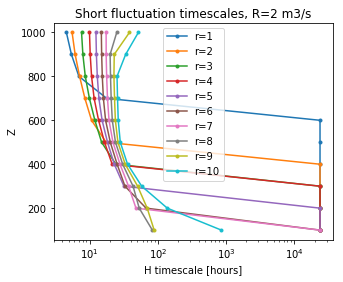

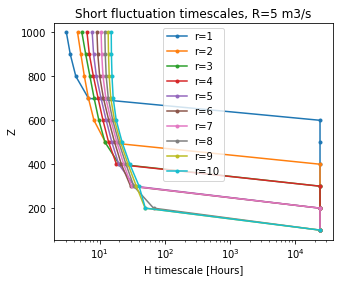

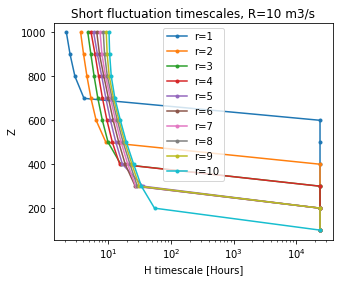

In [4]:
# plot timescale over Z, R is fixed
figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[:,1,i],Z,'.-')
    title('Short fluctuation timescales, R=2 m3/s')
    ylabel('Z')
    xlabel('H timescale [hours]')
    #xlim([0,65])
    legend(['r=1','r=2','r=3','r=4','r=5','r=6','r=7','r=8','r=9','r=10'])
    savefig('./GraphFourier/HtscZ_Recharge2.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[:,4,i],Z,'.-')
    title('Short fluctuation timescales, R=5 m3/s')
    ylabel('Z')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['r=1','r=2','r=3','r=4','r=5','r=6','r=7','r=8','r=9','r=10'])
    savefig('./GraphFourier/HtscZ_Recharge5.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[:,9,i],Z,'.-')
    title('Short fluctuation timescales, R=10 m3/s')
    ylabel('Z')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['r=1','r=2','r=3','r=4','r=5','r=6','r=7','r=8','r=9','r=10'])
    savefig('./GraphFourier/HtscZ_Recharge10.pdf')

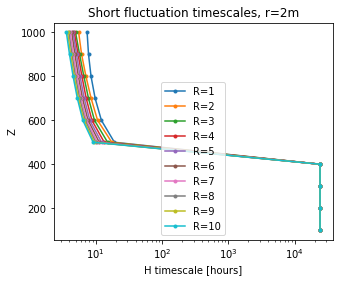

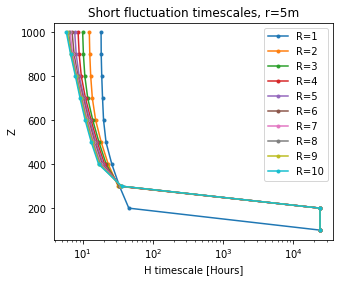

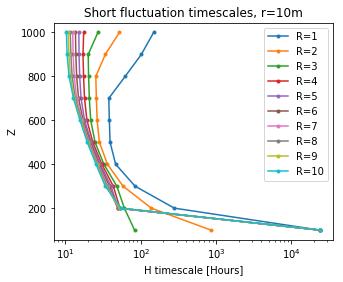

In [5]:
# plot timescale over Z, r is fixed
figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[:,i,1],Z,'.-')
    title('Short fluctuation timescales, r=2m')
    ylabel('Z')
    xlabel('H timescale [hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/HtscZ_r2.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[:,i,4],Z,'.-')
    title('Short fluctuation timescales, r=5m')
    ylabel('Z')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/HtscZ_r5.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[:,i,9],Z,'.-')
    title('Short fluctuation timescales, r=10m')
    ylabel('Z')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/HtscZ_r10.pdf')

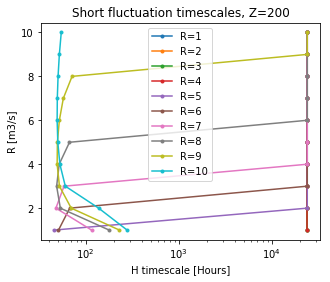

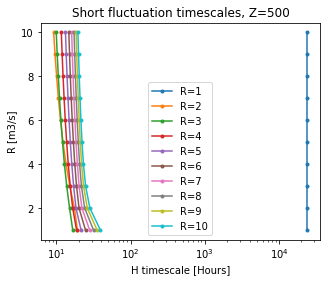

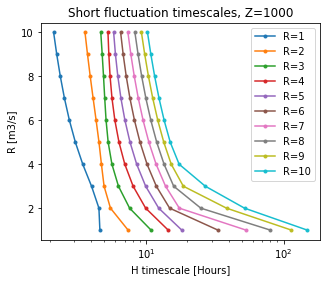

In [22]:
# plot timescale over R, Z is fixed
figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[1,:,i],R,'.-')
    title('Short fluctuation timescales, Z=200')
    ylabel('R [m3/s]')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/HtscRecharge_Z200.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[4,:,i],R,'.-')
    title('Short fluctuation timescales, Z=500')
    ylabel('R [m3/s]')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/HtscRecharge_Z500.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[9,:,i],R,'.-')
    title('Short fluctuation timescales, Z=1000')
    ylabel('R [m3/s]')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/HtscRecharge_Z1000.pdf')

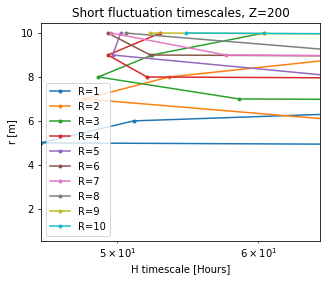

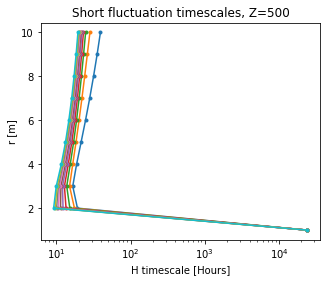

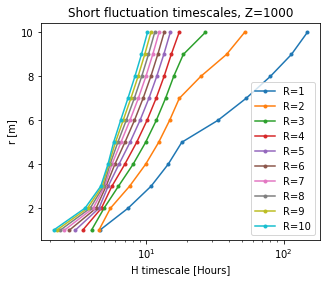

In [23]:
# plot timescale over r, Z is fixed
figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[1,i,:],r,'.-')
    title('Short fluctuation timescales, Z=200')
    ylabel('r [m]')
    xlabel('H timescale [Hours]')
    xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/Htscr_Z200.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[4,i,:],r,'.-')
    title('Short fluctuation timescales, Z=500')
    ylabel('r [m]')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    #legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/Htscr_Z500.pdf')

figure(figsize=(5,4))
for i in [0,1,2,3,4,5,6,7,8,9]:
    semilogx(htsc[9,i,:],r,'.-')
    title('Short fluctuation timescales, Z=1000')
    ylabel('r [m]')
    xlabel('H timescale [Hours]')
    #xlim([0,65])
    legend(['R=1','R=2','R=3','R=4','R=5','R=6','R=7','R=8','R=9','R=10'])
    savefig('./GraphFourier/Htscr_Z1000.pdf')

In [23]:
# to plot a figure of the peiodogram
# Odeint with a loop of parameters

R = array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]) #m^3/s
Z = array([100.,200.,300.,400.,500.,600.,700.,800.,900.,1000.]) # m, thickness of the ice
r = array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]) # m, radius of the moulin
L = 1000. #m
Days = 1000.     ; duration = Days*24.*3600.; tstep = duration/100.; time = linspace(0,duration,tstep)
initialpara=[200.,0.1]
t = time/(24*3600) # from seconds to days
htsc = np.zeros((10,10,10))
Actsc = np.zeros((10,10,10))
for i in [7]:
    for j in [1]:
        for k in [3]:
            #h=[]
            Ar = pi*r[k]**2. # m^2
            result = odeint(dh_Ac_dt, initialpara, time, args=(R[j], Z[i], Ar, L))
            h = result[:,0]
            Ac = result[:,1]
            f, Pxx_den = signal.periodogram(h)
            pic = f[Pxx_den.argmax()]
            htsc[i][j][k]=1/pic*100/3600
            f, Pxx_den = signal.periodogram(Ac)
            pic = f[Pxx_den.argmax()]
            #Actsc[i][j][k]=1/pic*100/3600

figure()
f, Pxx_den = signal.periodogram(h)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

'''
#figure(figsize=(15,4))
figure()
plot(t,h); title('Hydraulic head in the moulin'); ylabel('[m]'); xlabel('Day'); grid()
#figure(figsize=(15,4))
figure()
plot(t,Ac); title('Conduit Diameter'); ylabel('[m]'); xlabel('Day'); grid()
'''

"\n#figure(figsize=(15,4))\nfigure()\nplot(t,h); title('Hydraulic head in the moulin'); ylabel('[m]'); xlabel('Day'); grid()\n#figure(figsize=(15,4))\nfigure()\nplot(t,Ac); title('Conduit Diameter'); ylabel('[m]'); xlabel('Day'); grid()\n"